# 1. Get Players List


Scrap data from url : https://www.fotmob.com/api/leagueseasondeepstats?id=47&season=17664&stat=rating&type=players

In [ ]:
import requests
import pandas as pd
import json

# get JSON response
url = "https://www.fotmob.com/api/leagueseasondeepstats?id=47&season=17664&stat=rating&type=players"
response = requests.get(url)
json_data = response.text

# convert into JSON and get node statsData
data_dict = json.loads(json_data)
df_players = pd.DataFrame(data_dict['statsData'])

# print the resulting DataFrame
print(df_players)
df_players.to_csv('fotmob-premier-league-players-list.csv', index=False)

          id  teamId                                nameAndSubstatValue  \
0     675088    8456               {'name': 'Rodri', 'substatValue': 5}   
1     191869   10261     {'name': 'Kieran Trippier', 'substatValue': 3}   
2     961995    9825         {'name': 'Bukayo Saka', 'substatValue': 2}   
3     434325    9825       {'name': 'Thomas Partey', 'substatValue': 2}   
4     534670    9825     {'name': 'Martin Ødegaard', 'substatValue': 6}   
..       ...     ...                                                ...   
280   819762    8678        {'name': 'Chris Mepham', 'substatValue': 0}   
281   158545    8654     {'name': 'Michail Antonio', 'substatValue': 0}   
282   706297    9826  {'name': 'Jean-Philippe Mateta', 'substatValue...   
283  1177312    8466          {'name': 'Sékou Mara', 'substatValue': 0}   
284    19243    8602         {'name': 'Diego Costa', 'substatValue': 0}   

    statValue  rank     type statFormat substatFormat  
0        7.90     1  players   fraction    

# 2. Get Players rating from Fotmob by Match  

In [ ]:
def get_player_data_from_fotmob(player_id):
  url = "https://www.fotmob.com/api/playerData?id=" + str(player_id)
  response = requests.get(url)
  json_data = response.text

  # convert into JSON and get node statsData
  data_dict = json.loads(json_data)
  _player_height = None
  _player_preferred_foot = None
  _player_age = None
  _player_country = None
  _player_shirt = None
  _player_market_value = None
  if 'playerProps' in data_dict:
    for playerProp in data_dict['playerProps']:
      if playerProp['title'] == 'Height':
        _player_height = playerProp['value']
      elif playerProp['title'] == 'Preferred foot':
        _player_preferred_foot = playerProp['value']
      elif playerProp['title'] == 'Age':
        _player_age = playerProp['value']
      elif playerProp['title'] == 'Country':
        _player_country = playerProp['value']
      elif playerProp['title'] == 'Shirt':
        _player_shirt = playerProp['value']
      elif playerProp['title'] == 'Market value':
        _player_market_value = playerProp['value']

  # player information
  player_data = {
    'player_id' : data_dict['id'],
    'player_name' : data_dict['name'],
    'team_id' : data_dict['origin']['teamId'],
    'team_color' : data_dict['origin']['teamColor'],
    'team' : data_dict['origin']['teamName'],
    'player_position_primary' : data_dict['origin']['positionDesc']['primaryPosition'],
    'player_position_nonprimary' : data_dict['origin']['positionDesc']['nonPrimaryPositions'],
    'player_height' : _player_height,
    'player_preferred_foot' : _player_preferred_foot,
    'player_age' : _player_age,
    'player_country' : _player_country,
    'player_shirt' : _player_shirt,
    'player_market_value' : _player_market_value,
    'player_recent_matches' : data_dict['recentMatches']['Premier League'],
  }

  # player matches
  player_matches_data = []
  for _match in data_dict['recentMatches']['Premier League']:
    player_matches_data.append({
        'player_id' : player_data['player_id'],
        'match_date' : _match['date']['utcTime'],
        'match_id' : _match['versus']['matchId'],
        'match_home_team' : _match['htName'],
        'match_away_team' : _match['atName'],
        'match_home_team_score' : _match['versus']['homeTeamScore'],
        'match_away_team_score' : _match['versus']['awayTeamScore'],
        'match_player_minutes_played' : _match['minutesPlayed'],
        'match_player_goals' : _match['goals'],
        'match_player_assists' : _match['assists'],
        'match_player_yellow_cards' : _match['yellowCards'],
        'match_player_red_cards' : _match['redCards'],
        'match_player_rating' : _match['ratingProps']['num'],
        'match_player_rating_color' : _match['ratingProps']['bgcolor'],
    })
    
  # print the resulting DataFrame
  return player_data, player_matches_data

player_data, player_matches_data = get_player_data_from_fotmob(776151)
print(player_matches_data)

[{'player_id': 776151, 'match_date': '2023-03-12T15:00:00.000Z', 'match_id': 3901195, 'match_home_team': 'Fulham', 'match_away_team': 'Arsenal', 'match_home_team_score': 0, 'match_away_team_score': 3, 'match_player_minutes_played': 80, 'match_player_goals': 0, 'match_player_assists': 0, 'match_player_yellow_cards': 0, 'match_player_red_cards': 0, 'match_player_rating': '6.8', 'match_player_rating_color': '#f08022'}, {'player_id': 776151, 'match_date': '2023-03-04T16:00:00.000Z', 'match_id': 3901182, 'match_home_team': 'Arsenal', 'match_away_team': 'AFC Bournemouth', 'match_home_team_score': 3, 'match_away_team_score': 2, 'match_player_minutes_played': 45, 'match_player_goals': 1, 'match_player_assists': 0, 'match_player_yellow_cards': 0, 'match_player_red_cards': 0, 'match_player_rating': '7.7', 'match_player_rating_color': '#1ec853'}, {'player_id': 776151, 'match_date': '2023-03-01T20:45:00.000Z', 'match_id': 3900992, 'match_home_team': 'Arsenal', 'match_away_team': 'Everton', 'match_

In [ ]:
data_players = []
data_player_matches = []
for index, row in df_players.iterrows():
  player_data, player_matches_data = get_player_data_from_fotmob(row['id'])
  data_players.append(player_data)
  data_player_matches += player_matches_data

In [ ]:
# print the resulting DataFrame
df_data_players = pd.DataFrame(data_players)
if 'player_recent_matches' in df_data_players:
  df_data_players = df_data_players.drop(columns=['player_recent_matches'])
df_data_players.to_csv('fotmob-premier-league-players.csv', index=False)

# print the resulting DataFrame
df_data_player_matches = pd.DataFrame(data_player_matches)
df_data_player_matches.to_csv('fotmob-premier-league-players-matches.csv', index=False)



> Bloc en retrait



# 3. Get Match result history


Get all seasons available

In [ ]:
import requests
import pandas as pd
import json

# get JSON response
url = "https://www.fotmob.com/api/leagues?id=47&ccode3=SGP"
response = requests.get(url)
json_data = response.text
json_data = json.loads(json_data)

df_seasons = pd.DataFrame(json_data['allAvailableSeasons'])
print(df_seasons)

            0
0   2022/2023
1   2021/2022
2   2020/2021
3   2019/2020
4   2018/2019
5   2017/2018
6   2016/2017
7   2015/2016
8   2014/2015
9   2013/2014
10  2012/2013
11  2011/2012
12  2010/2011


For each season get results


In [ ]:
import requests
import pandas as pd
import json

for i, season in df_seasons.T.iteritems():
  print(season[0])


2022/2023
2021/2022
2020/2021
2019/2020
2018/2019
2017/2018
2016/2017
2015/2016
2014/2015
2013/2014
2012/2013
2011/2012
2010/2011


In [ ]:

data_matches = []
for i, row in df_seasons.T.iteritems():

  season = row[0]
  
  # get JSON response
  url = "https://www.fotmob.com/api/leagues?id=47&ccode3=SGP&season="+str(season)
  url
  response = requests.get(url)
  json_data = response.text
  json_data = json.loads(json_data)

  # get match from json
  for _match in json_data['matches']['allMatches']:

    # reset variables
    team_home_score = None
    team_away_home = None
    team_home_result = None
    team_away_result = None
  
    # match status 
    match_status = 'planned'
    if _match['status']['finished'] == True and _match['status']['cancelled'] == True:
        match_status = 'cancelled'
    elif _match['status']['finished'] == True and _match['status']['cancelled'] == False and _match['status']['started'] == True :
        match_status = 'finished'
    elif _match['status']['finished'] == True and _match['status']['cancelled'] == False and _match['status']['started'] == False :
        match_status = 'started'

    # split score 
    if _match['status'].get('scoreStr'):
      _score_splitted = (_match['status']['scoreStr']).split('-')
      team_home_score = int(_score_splitted[0].strip())
      team_away_score = int(_score_splitted[1].strip())
      if team_home_score == team_away_score:
        team_home_result = 'D'
        team_away_result = 'D'
      elif team_home_score > team_away_score:
        team_home_result = 'W'
        team_away_result = 'L'
      else:
        team_home_result = 'L'
        team_away_result = 'W'

    data_matches.append({
        'match_season' : str(season),
        'match_id' : _match['id'],
        'match_date' : _match['status']['utcTime'],
        'match_status' : match_status,
        'team_home_name' : _match['home']['name'],
        'team_home_name_short' : _match['home']['shortName'],
        'team_home_id' : _match['home']['id'],
        'team_home_score' : team_home_score,
        'team_home_result' : team_home_result,
        'team_away_name' : _match['away']['name'],
        'team_away_name_short' : _match['away']['shortName'],
        'team_away_id' : _match['away']['id'],
        'team_away_score' : team_away_score,
        'team_away_result' : team_away_result
    })

# convert into DataFrame and store it in CSV
df_matches = pd.DataFrame(data_matches)

print(df_matches)
df_matches.to_csv('fotmob-premier-league-matches.csv', index=False)

     match_season match_id                match_date match_status  \
0       2022/2023  3900932  2022-08-05T19:00:00.000Z     finished   
1       2022/2023  3900933  2022-08-06T11:30:00.000Z     finished   
2       2022/2023  3900934  2022-08-06T14:00:00.000Z     finished   
3       2022/2023  3900935  2022-08-06T14:00:00.000Z     finished   
4       2022/2023  3900937  2022-08-06T14:00:00.000Z     finished   
...           ...      ...                       ...          ...   
4935    2010/2011   840231  2011-05-22T13:00:00.000Z     finished   
4936    2010/2011   840234  2011-05-22T13:00:00.000Z     finished   
4937    2010/2011   840226  2011-05-22T13:00:00.000Z     finished   
4938    2010/2011   840229  2011-05-22T13:00:00.000Z     finished   
4939    2010/2011   840232  2011-05-22T13:00:00.000Z     finished   

               team_home_name team_home_name_short team_home_id  \
0              Crystal Palace       Crystal Palace         9826   
1                      Fulham        

# 4. Get Line Up by match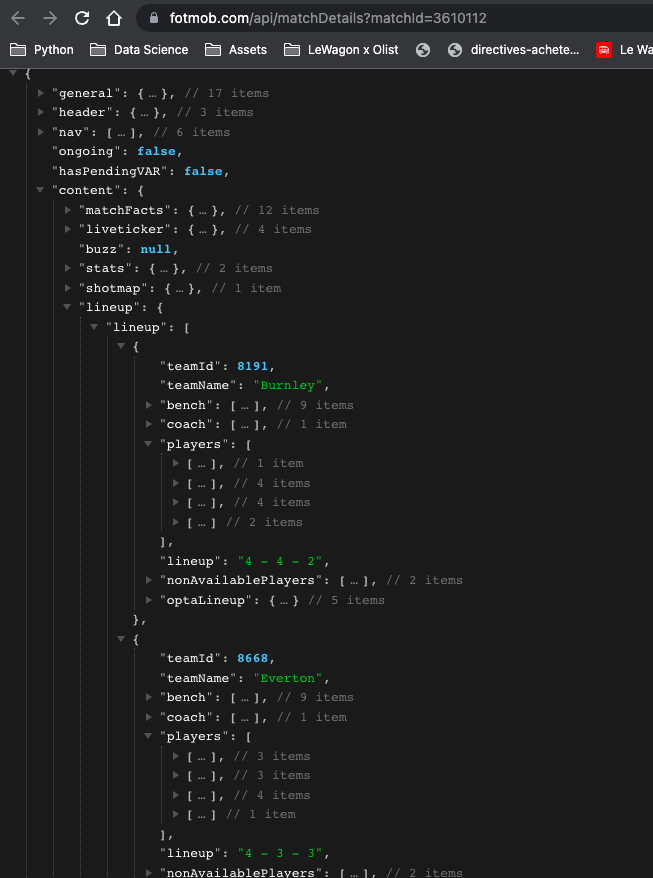

https://www.fotmob.com/api/matchDetails?matchId=3610112
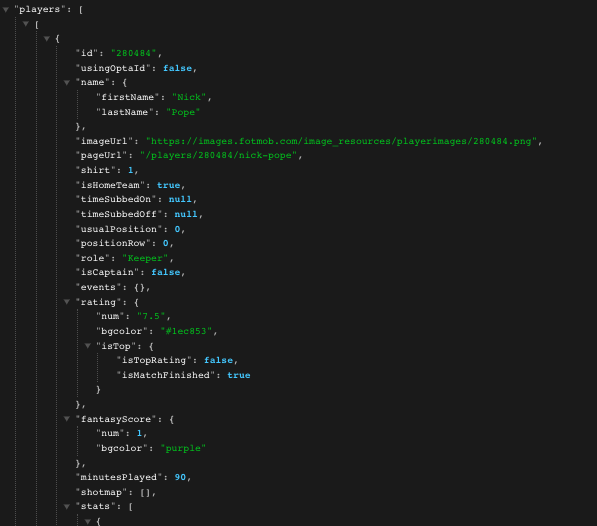

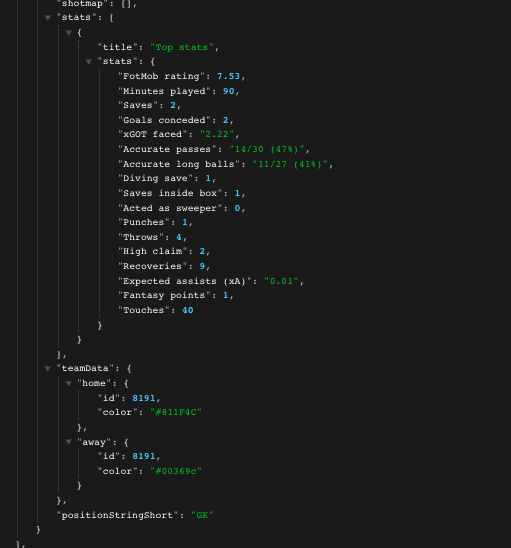

In [ ]:
import re

def get_match_data(matche_id):
  url = "https://www.fotmob.com/api/matchDetails?matchId=" + str(matche_id)
  print(url)
  response = requests.get(url)
  json_data = response.text
  json_match = json.loads(json_data)

  data_matches = {
      'match_id' : json_match['general']['matchId'],
      'match_name' : json_match['general']['matchName'],
      'match_round' : json_match['general']['matchRound'],
      'match_league_name' : json_match['general']['parentLeagueName'],
      'match_league_season' : json_match['general']['parentLeagueSeason'],
      'match_home_team_id' : json_match['general']['homeTeam']['id'],
      'match_home_team_name' : json_match['general']['homeTeam']['name'],
      'match_home_team_score' : json_match['header']['teams'][0]['score'],
      'match_home_team_image_url' : json_match['header']['teams'][0]['imageUrl'],
      'match_away_team_id' : json_match['general']['awayTeam']['id'],
      'match_away_team_name' : json_match['general']['awayTeam']['name'],
      'match_away_team_score' : json_match['header']['teams'][1]['score'],
      'match_away_team_image_url' : json_match['header']['teams'][1]['imageUrl'],
      'match_time_utc' : json_match['general']['matchTimeUTC'],
      'match_time_utc_date' : json_match['general']['matchTimeUTCDate'],
      'match_started' : json_match['general']['started'],
      'match_finished' : json_match['general']['finished'],
  }

  data_players_stats = []
  if data_matches['match_started'] == True and data_matches['match_finished'] == True:
    for index, players in enumerate(json_match['content']['lineup']['lineup'][0]['players']):
      for player in players:

        data_players_stats.append({
            'match_id' : data_matches['match_id'],
            'player_id' : player['id'],
            'player_name_firstname' : player['name']['firstName'],
            'player_name_lastname' : player['name']['lastName'],
            'player_name' : player['name']['firstName'] + ' ' + player['name']['lastName'],
            'player_image' : player['imageUrl'],
            'player_shirt' : player['shirt'],
            'player_is_home_team' : player['isHomeTeam'],
            'player_usual_position' : player['usualPosition'],
            'player_position_row' : player['positionRow'],
            'player_position_short' : player['positionStringShort'],
            'player_role' : player['role'],
            'player_rating' : player['rating']['num'],
            'player_rating_color' : player['rating']['bgcolor'],
            'player_minutes_played' : player['minutesPlayed'],
            'player_team_id' : json_match['content']['lineup']['lineup'][0]['teamId'],
            'player_team_name' : json_match['content']['lineup']['lineup'][0]['teamName']
        })
    
    for index, players in enumerate(json_match['content']['lineup']['lineup'][1]['players']):
      for player in players:

        data_players_stats.append({
            'match_id' : data_matches['match_id'],
            'player_id' : player['id'],
            'player_name_firstname' : player['name']['firstName'],
            'player_name_lastname' : player['name']['lastName'],
            'player_name' : player['name']['firstName'] + ' ' + player['name']['lastName'],
            'player_image' : player['imageUrl'],
            'player_shirt' : player['shirt'],
            'player_is_home_team' : player['isHomeTeam'],
            'player_usual_position' : player['usualPosition'],
            'player_position_row' : player['positionRow'],
            'player_position_short' : player['positionStringShort'],
            'player_role' : player['role'],
            'player_rating' : player['rating']['num'],
            'player_rating_color' : player['rating']['bgcolor'],
            'player_minutes_played' : player['minutesPlayed'],
            'player_team_id' : json_match['content']['lineup']['lineup'][1]['teamId'],
            'player_team_name' : json_match['content']['lineup']['lineup'][1]['teamName']
        })
  
  return data_matches, data_players_stats

  print(data_players)

get_match_data(3901179)

https://www.fotmob.com/api/matchDetails?matchId=3901179


({'match_id': '3901179',
  'match_name': 'Newcastle United-vs-Brighton & Hove Albion_Sat, Feb 25, 2023, 12:30 UTC',
  'match_round': '25',
  'match_league_name': 'Premier League',
  'match_league_season': '2022/2023',
  'match_home_team_id': 10261,
  'match_home_team_name': 'Newcastle United',
  'match_home_team_score': 0,
  'match_home_team_image_url': 'https://images.fotmob.com/image_resources/logo/teamlogo/10261_small.png',
  'match_away_team_id': 10204,
  'match_away_team_name': 'Brighton & Hove Albion',
  'match_away_team_score': 0,
  'match_away_team_image_url': 'https://images.fotmob.com/image_resources/logo/teamlogo/10204_small.png',
  'match_time_utc': 'Sat, Feb 25, 2023, 12:30 UTC',
  'match_time_utc_date': '2023-02-25T12:30:00.000Z',
  'match_started': False,
  'match_finished': True},
 [])

In [ ]:
import pandas as pd
import time

df_matches = pd.read_csv('fotmob-premier-league-matches.csv')

data_matches_all = []
data_players_stats_all = []
df_matches = df_matches[df_matches['match_season'].isin(['2022/2023', '2021/2022', '2020/2021', '2019/2020', '2018/2019'])]
for i, matche in df_matches.T.iteritems():
  data_matches, data_players_stats = get_match_data(matche['match_id'])
  # matches
  data_matches_all.append(data_matches)
  # players_stats
  data_players_stats_all += data_players_stats
  time.sleep(0.5)

df_matches = pd.DataFrame(data_matches_all)
df_matches.to_csv('fotmob-premier-league-matches-results.csv', index=False)

df_players_stats = pd.DataFrame(data_players_stats_all)
df_players_stats.to_csv('fotmob-premier-league-matches-players-stats.csv', index=False)

https://www.fotmob.com/api/matchDetails?matchId=3900932
https://www.fotmob.com/api/matchDetails?matchId=3900933
https://www.fotmob.com/api/matchDetails?matchId=3900934
https://www.fotmob.com/api/matchDetails?matchId=3900935
https://www.fotmob.com/api/matchDetails?matchId=3900937
https://www.fotmob.com/api/matchDetails?matchId=3900938
https://www.fotmob.com/api/matchDetails?matchId=3900939
https://www.fotmob.com/api/matchDetails?matchId=3900936
https://www.fotmob.com/api/matchDetails?matchId=3900940
https://www.fotmob.com/api/matchDetails?matchId=3900941
https://www.fotmob.com/api/matchDetails?matchId=3900943
https://www.fotmob.com/api/matchDetails?matchId=3900942
https://www.fotmob.com/api/matchDetails?matchId=3900945
https://www.fotmob.com/api/matchDetails?matchId=3900948
https://www.fotmob.com/api/matchDetails?matchId=3900950
https://www.fotmob.com/api/matchDetails?matchId=3900951
https://www.fotmob.com/api/matchDetails?matchId=3900944
https://www.fotmob.com/api/matchDetails?matchId=

In [ ]:
import pandas as pd
import time

df_matches = pd.read_csv('fotmob-premier-league-matches.csv')

data_matches_all = []
data_players_stats_all = []
df_matches = df_matches[df_matches['match_season'].isin(['2019/2020', '2018/2019'])]
for i, matche in df_matches.T.iteritems():
  data_matches, data_players_stats = get_match_data(matche['match_id'])
  # matches
  data_matches_all.append(data_matches)
  # players_stats
  data_players_stats_all += data_players_stats
  time.sleep(1)

df_matches = pd.DataFrame(data_matches_all)
df_matches.to_csv('fotmob-premier-league-matches-results-2019-2018.csv', index=False)

df_players_stats = pd.DataFrame(data_players_stats_all)
df_players_stats.to_csv('fotmob-premier-league-matches-players-stats-2019-2018.csv', index=False)

https://www.fotmob.com/api/matchDetails?matchId=3055738
https://www.fotmob.com/api/matchDetails?matchId=3055739
https://www.fotmob.com/api/matchDetails?matchId=3055741
https://www.fotmob.com/api/matchDetails?matchId=3055744
https://www.fotmob.com/api/matchDetails?matchId=3055742
https://www.fotmob.com/api/matchDetails?matchId=3055740
https://www.fotmob.com/api/matchDetails?matchId=3055745
https://www.fotmob.com/api/matchDetails?matchId=3055743
https://www.fotmob.com/api/matchDetails?matchId=3055746
https://www.fotmob.com/api/matchDetails?matchId=3055747
https://www.fotmob.com/api/matchDetails?matchId=3055748
https://www.fotmob.com/api/matchDetails?matchId=3055750
https://www.fotmob.com/api/matchDetails?matchId=3055756
https://www.fotmob.com/api/matchDetails?matchId=3055754
https://www.fotmob.com/api/matchDetails?matchId=3055749
https://www.fotmob.com/api/matchDetails?matchId=3055752
https://www.fotmob.com/api/matchDetails?matchId=3055753
https://www.fotmob.com/api/matchDetails?matchId=

KeyError: ignored